In [2]:
import numpy as np # linear algebra
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,12)

In [4]:
data = pd.read_csv('Smoker_Epigenetic_df.csv')

In [5]:
data.head(10)

,GSM,Smoking Status,Gender,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,GSM1051525,current,f,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,GSM1051526,current,f,49,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,GSM1051527,current,f,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,GSM1051528,current,f,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,GSM1051529,never,f,33,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857
5,GSM1051530,current,f,59,0.622860,0.501685,0.263227,0.415746,0.475189,0.253904,...,0.025835,0.309210,0.321857,0.533367,0.571552,0.210975,0.377824,0.469361,0.343332,0.045779
6,GSM1051531,never,f,66,0.409273,0.378416,0.242161,0.279939,0.234222,0.255936,...,0.035112,0.182076,0.398945,0.391416,0.451552,0.205956,0.436584,0.253315,0.094898,0.060545
7,GSM1051532,current,f,51,0.386916,0.272604,0.425061,0.351245,0.413535,0.227764,...,0.082291,0.528582,0.276791,0.377234,0.522337,0.150980,0.262195,0.361602,0.203181,0.061299
8,GSM1051533,current,m,55,0.830905,0.301801,0.849974,0.031347,0.814698,0.074442,...,0.040486,0.043005,0.027229,0.978406,0.922987,0.078711,0.871157,0.013511,0.381137,0.070185
9,GSM1051534,never,m,37,0.820439,0.028893,0.884066,0.032633,0.850011,0.055499,...,0.021319,0.045582,0.018422,0.963112,0.923062,0.048921,0.872822,0.015901,0.599377,0.023780


In [6]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

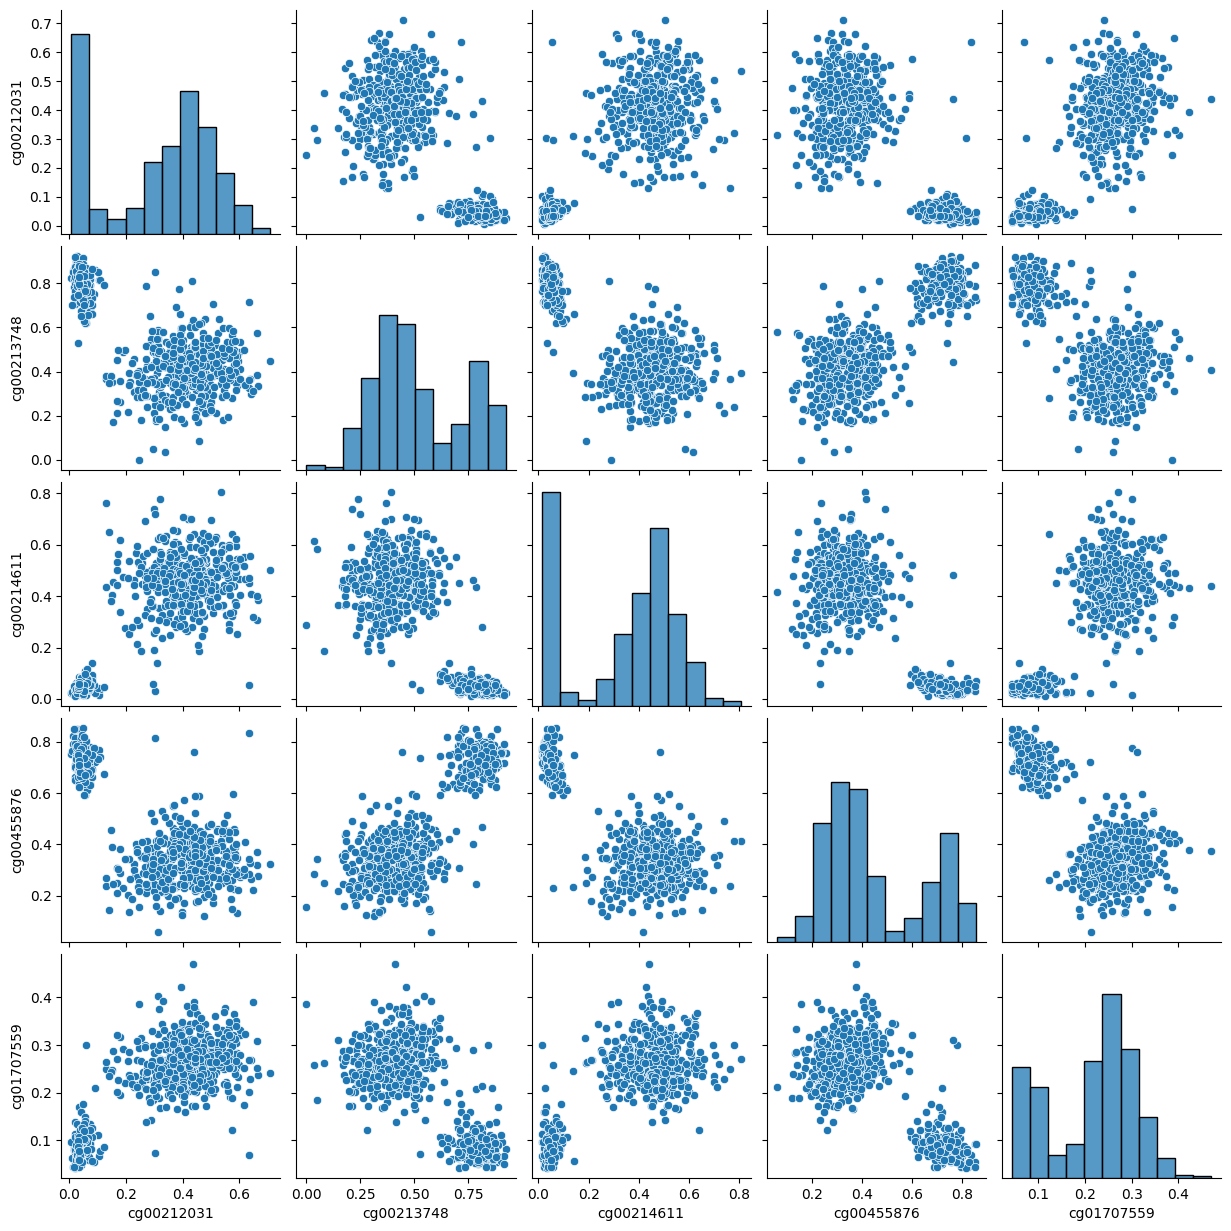

In [7]:
sns.pairplot(data.iloc[:,5:10])

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
data = data[~data.isna()]

In [10]:
rfr = RandomForestRegressor()
rfr.fit(data.iloc[:400,5:10],data.iloc[:400,3])

RandomForestRegressor()

In [11]:
features = rfr.feature_importances_

Text(0, 0.5, 'Importance')

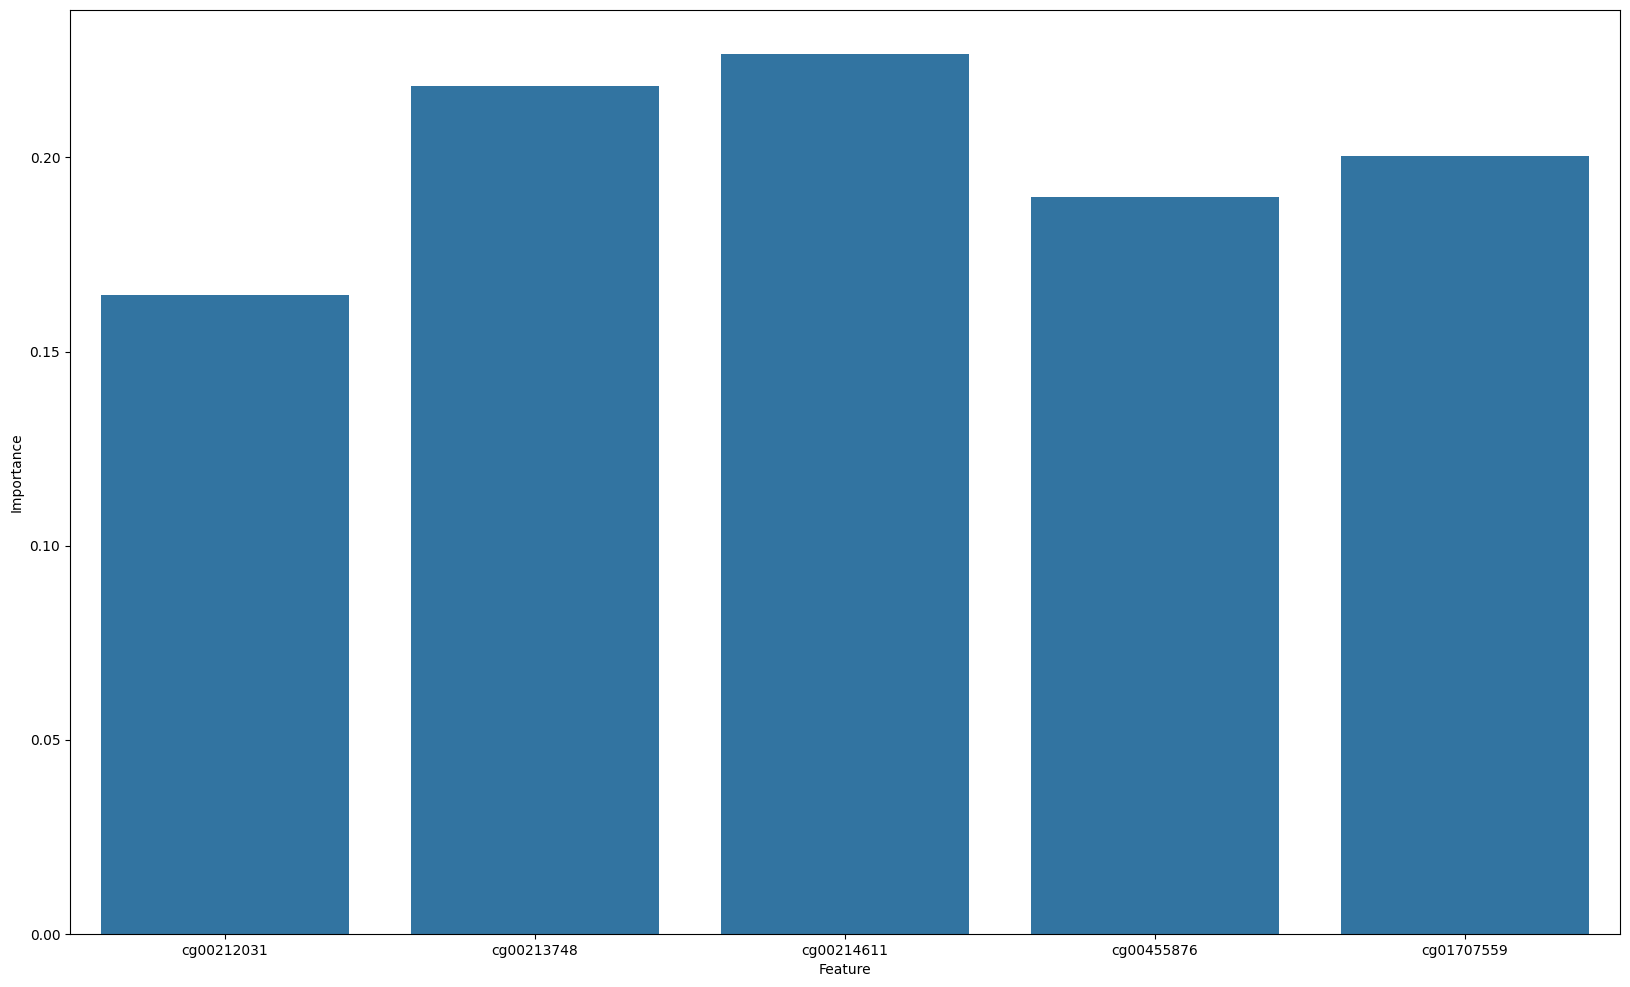

In [12]:
ax = sns.barplot(x=data.columns[5:10],y=features)
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
# Split features and target variable
X = data.drop(['GSM', 'Age'], axis=1)  # Dropping GSM column as it seems to be an identifier, and Age is the target variable
y = data['Age']


In [19]:
# Define numerical columns (excluding 'GSM')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
    ])

In [18]:
numerical_cols = ['col1', 'col2', 'col3'] # Replace with the actual numerical column names

In [16]:
from sklearn.compose import ColumnTransformer

In [20]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)


In [21]:
## Define the pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


In [23]:
# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [24]:
print(X_train.head())

    Smoking Status Gender  cg00050873  cg00212031  cg00213748  cg00214611  \
312        current      f    0.616382    0.396199    0.342582    0.488245   
202        current      f    0.520705    0.572640    0.566516    0.321289   
263          never      m    0.847513    0.026540    0.789878    0.017185   
395        current      m    0.846802    0.063172    0.799476    0.073348   
101          never      f    0.618691    0.406153    0.507279    0.483013   

     cg00455876  cg01707559  cg02004872  cg02011394  ...  cg02494853  \
312    0.336163    0.268887    0.158538    0.791735  ...    0.030424   
202    0.148873    0.187999    0.165454    0.499760  ...    0.021925   
263    0.770312    0.134488    0.021526    0.973726  ...    0.049376   
395    0.626176    0.092051    0.053331    0.948855  ...    0.059009   
101    0.172770    0.283262    0.234355    0.442366  ...    0.070707   

     cg02839557  cg02842889  cg03052502  cg03155755  cg03244189  cg03443143  \
312    0.445155    0.3576

In [25]:
print('col1' in X_train.columns)

False


In [ ]:
# Replace 'col1' with the correct column name
my_pipeline.fit(X_train[['Gender']], y_train)

In [30]:
print(X_train.dtypes)
print(y_train.dtypes)

Smoking Status     object
Gender             object
cg00050873        float64
cg00212031        float64
cg00213748        float64
cg00214611        float64
cg00455876        float64
cg01707559        float64
cg02004872        float64
cg02011394        float64
cg02050847        float64
cg02233190        float64
cg02494853        float64
cg02839557        float64
cg02842889        float64
cg03052502        float64
cg03155755        float64
cg03244189        float64
cg03443143        float64
cg03683899        float64
cg03695421        float64
cg03706273        float64
dtype: object
int64


In [ ]:
print(X_train['current'].value_counts())

KeyError: 'current'

In [1]:
# Predictions
preds = my_pipeline.predict(X_test)

NameError: name 'my_pipeline' is not defined

In [ ]:
# Model evaluation
score_mae = mean_absolute_error(y_test, preds)
score_mse = mean_squared_error(y_test, preds)
score_r2 = r2_score(y_test, preds)

In [ ]:
print('MAE:', score_mae)
print('MSE:', score_mse)
print('R^2:', score_r2)